In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## データ準備

In [2]:
df = sns.load_dataset("tips")
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

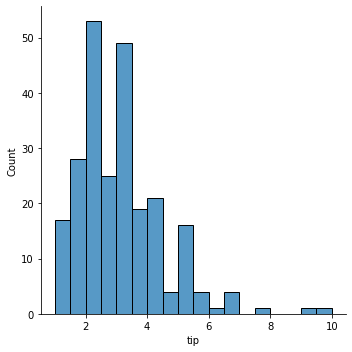

In [4]:
sns.displot(df['tip'], kde=False)

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


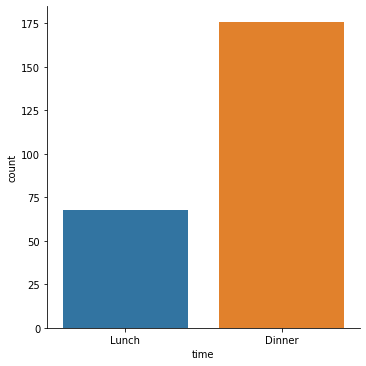

In [5]:
sns.catplot('time', data=df, kind='count')

## 平均値

In [6]:
np.mean(df['tip_rate'])

0.16080258172250478

In [7]:
df['tip_rate'].mean()

0.16080258172250478

In [8]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

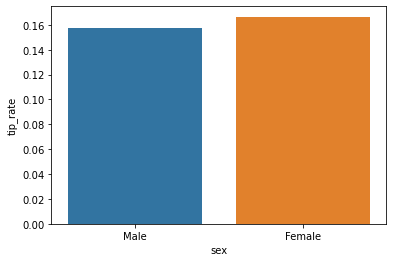

In [9]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

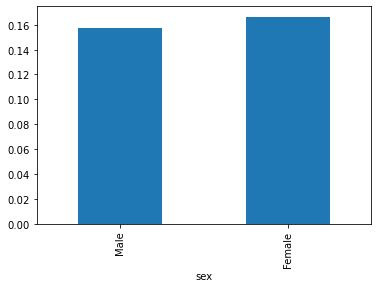

In [10]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [11]:
np.median(df['tip_rate'])

0.15476977125802577

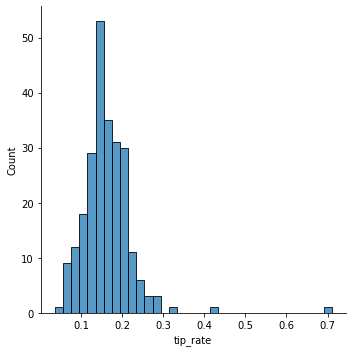

In [12]:
sns.displot(df['tip_rate'], kde=False)

In [13]:
df['tip_rate'].median()

0.15476977125802577

In [14]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

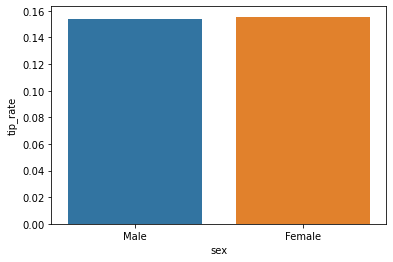

In [15]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [16]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [17]:
stats.mode(df)

ModeResult(mode=array([[13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2, 0.1448225923244026]],
      dtype=object), count=array([[  3,  33, 157, 151,  87, 176, 156,   2]]))

In [18]:
df['size'].mode()

0    2
Name: size, dtype: int64

## 範囲

In [19]:
np.min(df['tip'])

1.0

In [20]:
df['tip'].min()

1.0

In [21]:
df.groupby('sex').min()

<ipython-input-21-3eee47c2438f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('sex').min()


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [22]:
np.max(df['tip'])

10.0

In [23]:
df['tip'].max()

10.0

In [24]:
df.groupby('sex').max()

<ipython-input-24-0858c75f568a>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('sex').max()


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [25]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [26]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [27]:
stats.iqr(df['tip_rate'])

0.06234812458689151

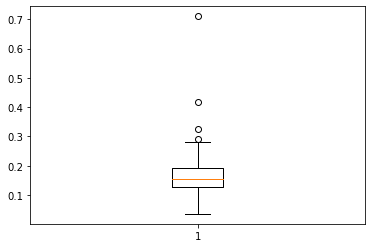

In [28]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

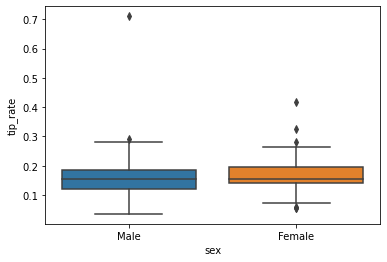

In [29]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散

In [30]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [31]:
np.std(df['tip'])

1.3807999538298958

In [32]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

In [33]:
tip_mean = df['tip'].mean()
tip_mean

2.9982786885245902

## 共分散

In [36]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [39]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [40]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

In [41]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [42]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [43]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

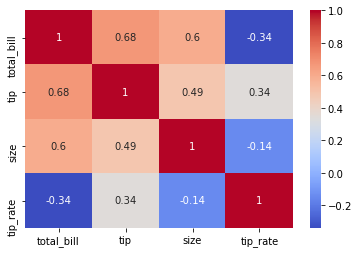

In [46]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [49]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [50]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [51]:
def cramers_v(x,y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [52]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [4]:
# random variates(rvs) : 確率変量
stats.randint.rvs(1, 7)

1

In [6]:
stats.uniform.rvs(0, 1)

0.5548557666506296

## 確率分布の描画

In [19]:
def simple_func(x):
    return x**2 + 3

In [20]:
simple_func(10)

103

In [24]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
y = simple_func(x)

In [26]:
x

array([-3, -2, -1,  0,  1,  2,  3])

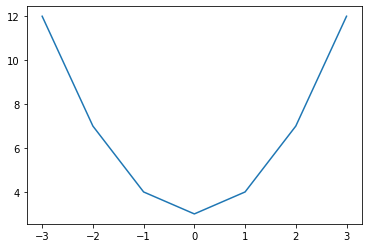

In [27]:
plt.plot(x, y)

In [35]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)

In [33]:
x

array([1, 2, 3, 4, 5, 6])

In [36]:
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

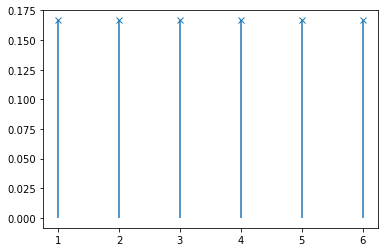

In [42]:
plt.plot(x, y ,'x')
plt.vlines(x, 0, y)

In [48]:
x = np.linspace(-2, 4, 100)
y = stats.uniform(loc=0, scale=2).pdf(x)

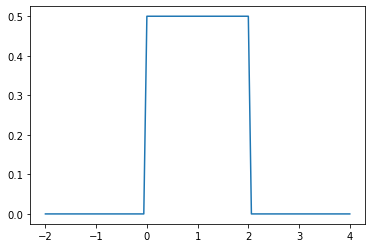

In [49]:
plt.plot(x, y)